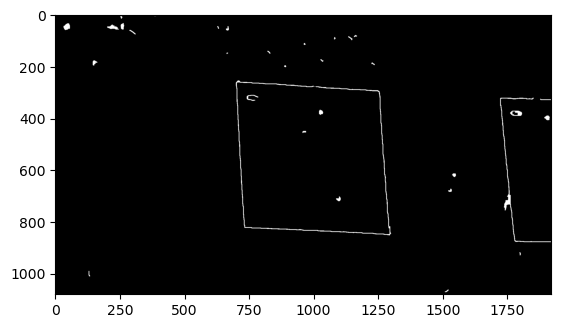

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
from imutils import perspective
from draw_images import draw_images

# model_path = '../res/input/target.jpg'
# video_path = '../res/input/video.mp4'
model_path = '../res/input/target3.jpg'
video_path = '../res/input/05.mp4'
model = cv2.imread(model_path)
cap = cv2.VideoCapture(video_path)

cap.get(cv2.CAP_PROP_FRAME_COUNT) # Get frame count of movie
cap.set(cv2.CAP_PROP_POS_MSEC, 3000) # frame at 4000ms
_, frame = cap.read()

frame_gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
kernel = (7, 7)
cv2.GaussianBlur(frame_gray, kernel, 0)

edged = cv2.Canny(frame_gray, 150, 255)
edged = cv2.dilate(edged, None, iterations=5)
edged = cv2.erode(edged, None, iterations=4)
plt.imshow(edged, 'gray')

Number of contours detected: 28


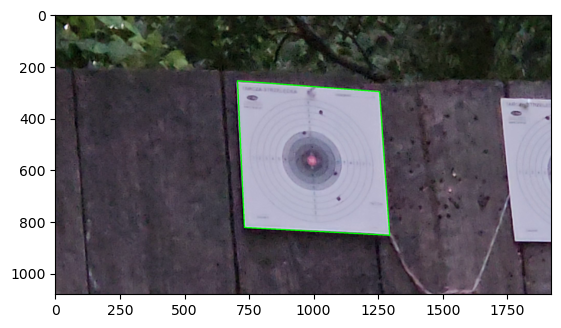

In [2]:
contours = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
print("Number of contours detected:", len(contours))
frame_rect = np.copy(frame)
for countur in contours:
    peri = cv2.arcLength(countur, True)
    approx = cv2.approxPolyDP(countur, 0.02 * peri, True)
    if len(approx) == 4:
        hull = cv2.convexHull(approx,returnPoints = False)
        defects = cv2.convexityDefects(approx,hull)

        sum_of_defects=0
        if type(defects) != type(None):
            for i in range(defects.shape[0]):
                s,e,f,d = defects[i,0]
                sum_of_defects=sum_of_defects+d

        if sum_of_defects <= 3:
            cv2.drawContours(frame_rect, [approx], -1, (0,255,0), 3)
        else:
            print("approx is not convex")
plt.imshow(cv2.cvtColor(frame_rect, cv2.COLOR_BGR2RGB))